### PlantGrowth R dataset project
#### Problem statement
Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

- Download and save the dataset to your repository.

- Describe the data set in your notebook.

- Describe what a t-test is, how it works, and what the assumptions are.

- Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

- Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

- Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.



#### 1.1 Introduction

![Venus Fly Trap](images/venusflytrap.PNG)
<br>
<br>
This project involves an analysis of the PlantGrowth dataset from Vincent Arel Bundock's [r rdatasets collection](https://vincentarelbundock.github.io/Rdatasets/). The dataset includes two variables: plant weight and treatment groups. My objective is to examine any potential differences in plant growth across these groups using t-tests and ANOVA. The analysis will help us to understand more about the impact of growth treatments on plant weight.

We'll start off by important the relevant libraries. 















In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_rel, ttest_ind

I'll also define the colour palette to be used within the project:

In [36]:
palette = {"ctrl": "palegreen", "trt1": "mediumpurple", "trt2": "plum"}

#### 1.2 Dataset description and visualisation
##### 1.2.1 Dataset introduction
We need to read in the csv and display the dataframe information. The `info()` method provides information about the dataset, including the number of rows, columns, column names, data types, and memory usage.

In [37]:
# Let's load the .csv into a dataframe and get the df info
pgdata = pd.read_csv(r'C:\Users\Administrator\Data Analytics\Applied Statistics\data\plantgrowth.csv') 
pgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


This helps to confirm that treatment is a categorical variable and weight is a numerical variable. This confirmation is important in the planning stages, since both the t-test and the ANOVA assume specific data types. We can see that there are 30 non-null entries so now we know the sample size and since the values are non-null, we don't need to be concerned about any missing values. Let's double check to be sure and also check for duplicates:

In [38]:
# Checking for missing values
missing_values = pgdata.isnull().sum()
print("Missing Values:\n", missing_values)

# Now we'll check for duplicate rows
duplicate_rows = pgdata.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)


Missing Values:
 rownames    0
weight      0
group       0
dtype: int64

Number of Duplicate Rows: 0


In [39]:
summary_stats = pgdata.groupby('group')['weight'].describe()
print(summary_stats)

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


##### 1.2.2 Dataset Visualisation

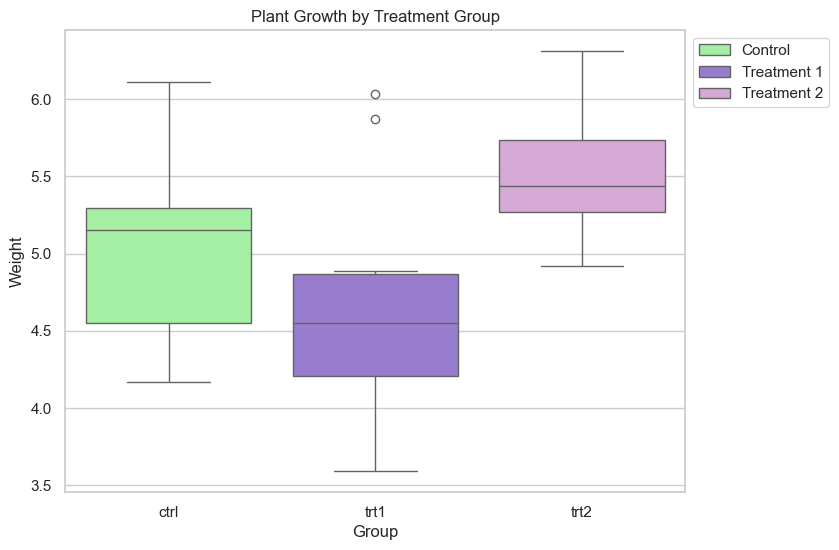

In [40]:
# Create boxplot
plt.figure 

# Got an error initially: "Assign the `x` variable to `hue` and set `legend=False` for the same effect" - so added these
sns.boxplot(data=pgdata, x='group', y='weight', hue='group', palette=palette, legend=False)

# Moved legend to outside the plot as the default was obscuring the plot
# https://matplotlib.org/stable/users/explain/axes/legend_guide.html
plt.legend(labels=["Control", "Treatment 1", "Treatment 2"], bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Plant Growth by Treatment Group')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()







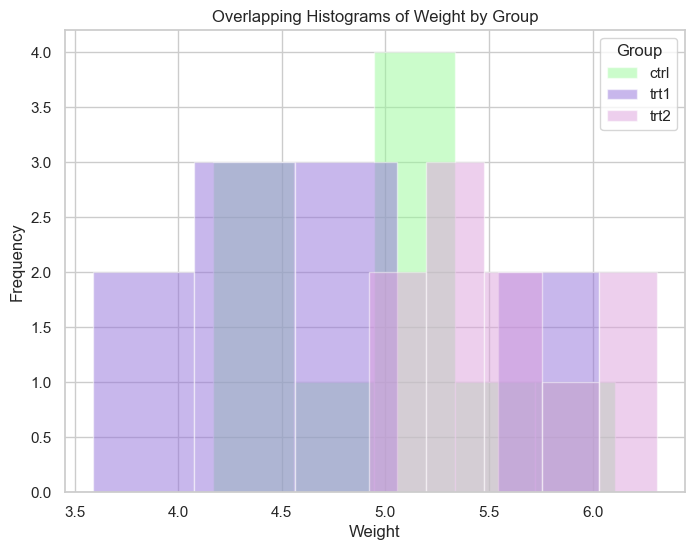

In [41]:
# Overlapping histograms using ax.hist
fig, ax = plt.subplots(figsize=(8, 6))

# https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/04_t_tests.ipynb
ax.hist(pgdata[pgdata['group'] == 'ctrl']['weight'], bins=5, color='palegreen', alpha=0.5, label='ctrl')
ax.hist(pgdata[pgdata['group'] == 'trt1']['weight'], bins=5, color='mediumpurple', alpha=0.5, label='trt1')
ax.hist(pgdata[pgdata['group'] == 'trt2']['weight'], bins=5, color='plum', alpha=0.5, label='trt2')


ax.set_xlabel("Weight", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Overlapping Histograms of Weight by Group")
ax.legend (title="Group")
plt.show()


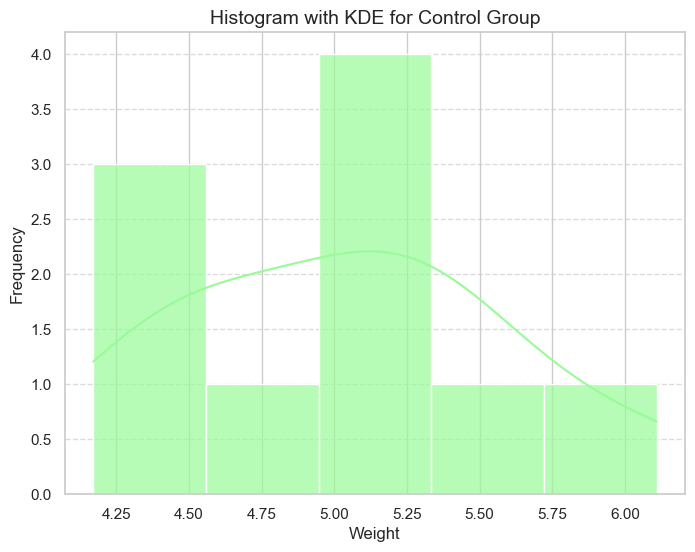

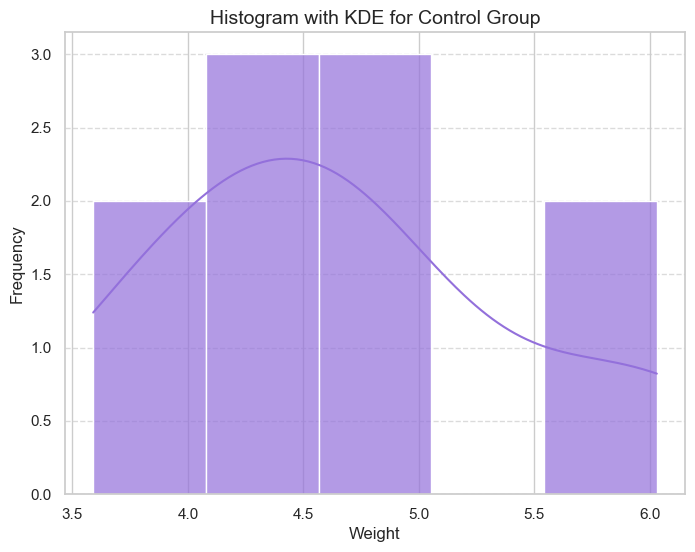

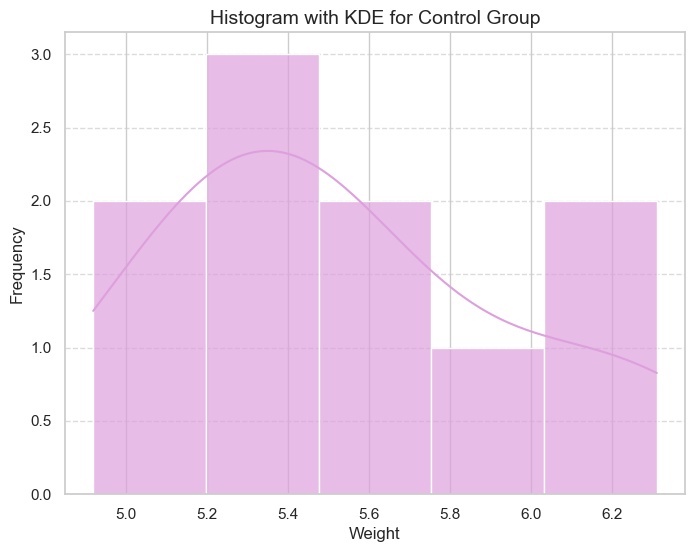

In [42]:
ctrl_group = pgdata[pgdata['group'] == 'ctrl']


plt.figure(figsize=(8, 6))
sns.histplot(ctrl_group['weight'], kde=True, bins=5, color='palegreen', alpha=0.7)
plt.title('Histogram with KDE for Control Group', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


trt1_group = pgdata[pgdata['group'] == 'trt1']


plt.figure(figsize=(8, 6))
sns.histplot(trt1_group['weight'], kde=True, bins=5, color='mediumpurple', alpha=0.7)
plt.title('Histogram with KDE for Control Group', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


trt2_group = pgdata[pgdata['group'] == 'trt2']


plt.figure(figsize=(8, 6))
sns.histplot(trt2_group['weight'], kde=True, bins=5, color='plum', alpha=0.7)
plt.title('Histogram with KDE for Control Group', fontsize=14)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

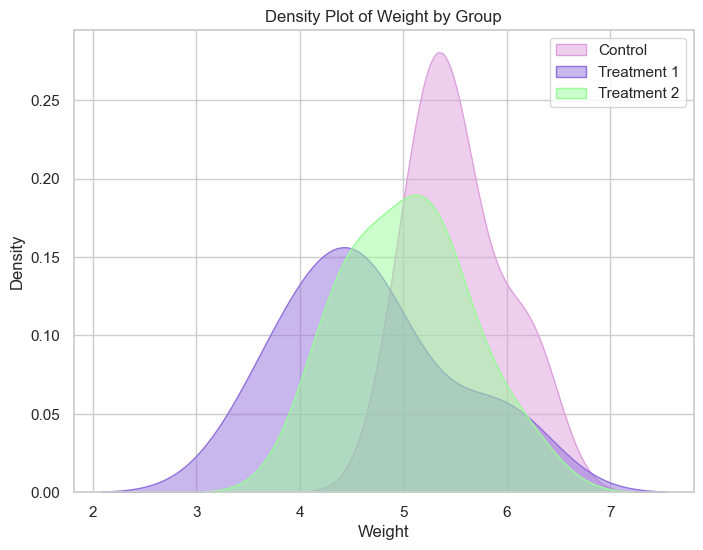

In [43]:
# Lastly, let's create a density plot
# Idea from https://python-graph-gallery.com/density-chart-multiple-groups-seaborn/
plt.rcParams["figure.figsize"]=8,6
sns.set_theme(style="whitegrid")
sns.kdeplot(data=pgdata, x='weight', hue='group', fill=True, palette=palette, alpha=0.5)

# Add title, labels and a legendS
plt.title("Density Plot of Weight by Group")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend(labels=["Control", "Treatment 1", "Treatment 2"])
plt.show()


##### 1.2.3 Assumption of Normality

#### 1.3 The T-Test - Definitions and Assumptions


#### 1.4 T-test between treatment groups 

A t-test is a statistical method used to determine if there is a significant difference between the means of two groups. It assesses whether the observed differences are due to random variation or a true effect. There are several types of t-test: a one-sample t-test compares a group mean to a known value, an independent t-test compares means of two separate groups, and a paired t-test compares related groups. 



In [44]:
# Step 1
# We're just looking at treatment groups (not ctrl) - we'll filter by these 2
trt1 = pgdata[pgdata['group'] == 'trt1']['weight']
trt2 = pgdata[pgdata['group'] == 'trt2']['weight']

# Now calculate the mean difference
mean_diff = trt1.mean() - trt2.mean()

# Lastly print the result
print("Mean Difference (d̄) between trt1 and trt2:", mean_diff)


Mean Difference (d̄) between trt1 and trt2: -0.8650000000000002


In [45]:
# Step 2: Calculate the differences between paired observations
differences = pgdata[pgdata['group'] == 'trt1']['weight'].reset_index(drop=True) - \
              pgdata[pgdata['group'] == 'trt2']['weight'].reset_index(drop=True)

# Now calculate the standard deviation of the sample differences
std_diff = differences.std()

# Lastly print the result
print("Standard deviation of the sample (σ̂):", std_diff)


Standard deviation of the sample (σ̂): 0.9610093073893141


In [46]:
# Step 3: Calculate the paired t-statistic manually
n = len(differences) 
t_stat = mean_diff / (std_diff / np.sqrt(n))

# Lastly print the result
print("Paired t-statistic:", t_stat)


Paired t-statistic: -2.8463513880802864


#### 1.5 ANOVA - Definitions and assumptions

#### References
https://www.statology.org/paired-t-test-assumptions/